# NumPy for Images and Computer Vision

- Minor Applied Artificial Intelligence, Hogeschool van Amsterdam (AUAS)
- Lecturer: Michiel Bontenbal 
- Date: Friday 9 February 2024

### Goal of this notebook
In this notebook we will use Numpy for images and computer vision. 

You will:
- learn how an image/video can be converted to data as a Numpy array.
- learn basics of 'image augmentation'
- learn that Numpy array is a fast datatype that can be used for deep learning.


### Contents
0. Import modules
1. Intro numpy arrays
2. Images to numpy arrays
3. Image data augmentation
4. Which one is faster? Numpy array vs python list.

----
### Sources & further reading:
 
**Python Data Science Handbook - Jake Vanderplas**

Chapter 2. Introduction to NumPy
- https://learning.oreilly.com/library/view/python-data-science/9781491912126/ch02.html#introduction-to-numpy

**Deep Learning with Python - Francois Chollet**
- https://learning-oreilly-com.rps.hva.nl/library/view/deep-learning-with/9781617296864/

READ THIS: As a student you have access to O'Reilly books through the HvA libarry:
https://lib.hva.nl/permalink/31UKB_UAM2_INST/ooc2dr/alma9939149327405132 
and click on proviced link + login etc.

### NumPy tutorials

You can start your learning journey by looking at the following material:
- https://numpy.org/devdocs/user/quickstart.html
- https://www.w3schools.com/python/numpy/default.asp

----
Acknowledgements: Stijn Oomes 

## 0. Import modules

In [1]:
# Check your version of python
from platform import python_version
print(python_version())

3.11.5


In [2]:
#import numpy and check version
import numpy as np
print(np.__version__)

1.24.3


In [3]:
#import PIL (Python Image Libary) and Matplotlib for working with images
from PIL import Image
from matplotlib import pyplot as plt

## 1. Intro to numpy arrays

The following code is based on based on 'Deep Learning for Python' paragraph 2.2.

In this section we'll learn that images can be converted to data in the form of <i>tensors</i>.
If you've never heard about tensors before, you can think of them as a container for data. 
In Numpy tensors are called arrays. 

Tensors / arrays can come in different shapes, based on the number of dimensions.

<img src="https://cac.cornell.edu/myers/teaching/ComputationalMethods/python/anatomyarray.png" /> 

In [4]:
# CODE EXAMPLE 1: convert an integer to a numpy array
import numpy as np
a = np.array(12) #convert the integer 12 to a numpy array
print(a)
print(a.ndim) # print the number of dimensions

12
0


In the example above you see that the number of dimensions was zero, therefore it is called a rank-0 tensor and is known in maths as a 'scalar'. 

We are interested in the following methods:
- ndim = number of dimensions
- shape = the shape of the array
- dtype = the datatype for example float32, float63 or uint.
- nbytes = the size of the array in bytes

and to check the type of the python object:
- type(a)


### Exercise 1

Look up all in built methods of the given array a with dir()

In [5]:
#YOUR CODE HERE
# a = np.array([12,3,14,7])
print(dir(a))

['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__class_getitem__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__dlpack__', '__dlpack_device__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__',

### Exercise 2
Print the type, shape, datatype and size of the array given in code example 1

In [6]:
#YOUR CODE HERE
print(type(a)) 
print(a.shape)
print(a.dtype)
print(a.size)
# print the shape of the array

<class 'numpy.ndarray'>
()
int64
1


In the exercises below you will make tensors with one, two and three dimensions.

A list is an tensor with 1 dimension, it's also called a 'vector'.

### Exercise 3
Convert the python list to a Numpy array. Print it and print number of dimensions.

In [7]:
numbers = [2,5,6,7,10]
#YOUR CODE HERE
numbers = np.array(numbers)
print(numbers.ndim)

1


### Exercise 4:
A matrix is a 2D tensor. It consists of columns and rows.
Convert the matrix below to a numpy array and check the number of dimensions.

In [8]:
matrix = [[1,2,3],
         [4,5,6],
         [7,8,9]]

#YOUR CODE HERE
matrix = np.array(matrix)
print(matrix.ndim)

2


## 2. Convert an image to a Numpy array

To convert an image to a numpy array and show it on the screen we will use three modules: 
1. PIL or Python Image Library, a module for images
2. Matplotlib, a widely used plotting libary for plotting the images
3. Numpy

TO DO: Select an image from the web.

Shape: (408, 612, 3)


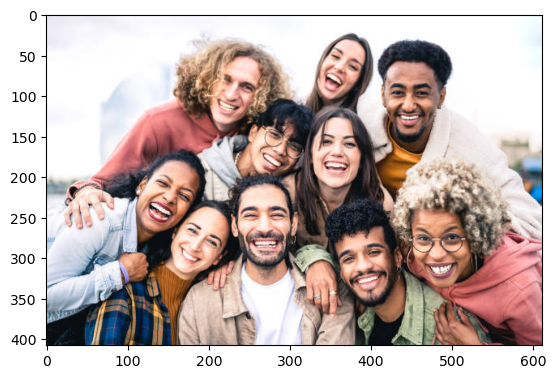

In [9]:
# CODE EXAMPLE 2: Convert an image to an array and plot it

#import the modules
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

#open image an convert to numpy array
img = Image.open('7 new people.jpg')  # select a .jpg image from the web/your pc 
a = np.asarray(img)

#show the image and shape
plt.imshow(a)
print(f'Shape: {a.shape}')

### Exercise 5: get RGB values
Look up 'array indexing' in one of the tutorials.
Print the RGB values of pixel (100,200)

In [10]:
#YOUR CODE HERE
print(a[100,200])

[255 229 197]


Bonus: can you change the value of this pixel to black? Print the result.

In [11]:
#YOUR CODE HERE
b = a.copy()
b.setflags(write=1)
b[100,200] = [0,0,0]
print(b[100,200])

[0 0 0]


## 3. Image data augmentation

What you've done in the last exercise is also called 'image data augmentation'. This is a way to make your dataset larger if you have a limited number of images.  

For the project of the AAI course, you might want to do a project for Object Detection. If you do such a project you will need to create or augment (=verbeteren) a image dataset. In the next exercise you learn to multiply a set of 10 images to 40 images using Numpy. 

### TO DO:
- Look up the numpy method flip(), fliplr() and flipud().
- Look up PIL documentation to do save the image as a new .jpg

### Exercise 6: Flip an image left-right

To do:
- Flip your image left-right and show it using matplotlib
- Use PIL to save it as a .jpg.
- Show all 

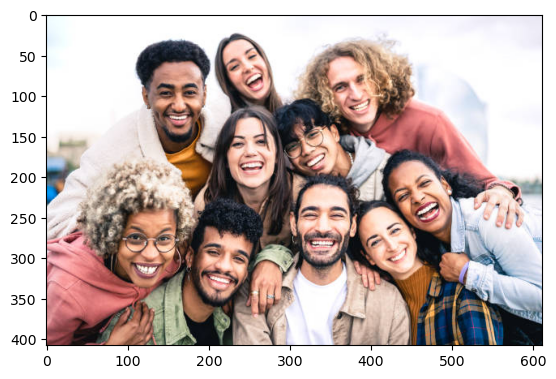

In [12]:
#YOUR CODE HERE
fliiped_a = np.flip(a, axis=1)
plt.imshow(fliiped_a)

### Exercise 7: Flip both images up-down

- Flip the two images (original + flipped image) up-down and save as jpg.
- Show all 4 images here below

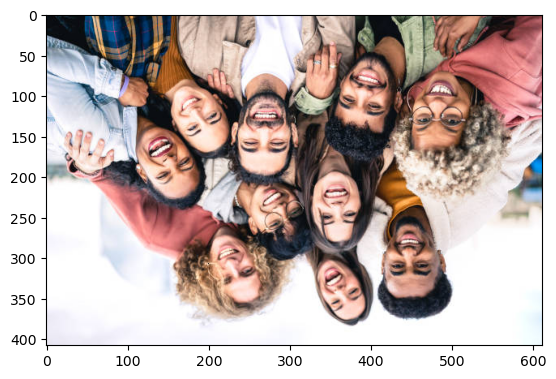

In [13]:
# YOUR CODE HERE
flipped_b = np.flip(b, axis=0)
plt.imshow(flipped_b)

## 4. Which one is faster? Numpy arrays vs Python lists

### Measure execution time
First, let's discover two ways of measuring execution time>

In [14]:
#let's create a long list using the random module and calculate the sum
import random
long_list = [random.random() for i in range(0, 10000000)]
print(sum(long_list)) #the sum of all the numbers 

5000799.300426506


### Exercise 8: 
Write a short script that:
- get time of the start
- calculates the sum of the list
- get the time of the end
- calculate length of the script by distracting starttime from endtime.

Hint: `import time`

In [15]:
#YOUR CODE HERE
import time
start = time.time()
print(sum(long_list))
end = time.time()
print("Total time:", end-start)


5000799.300426506
Total time: 0.048681020736694336


Fortunately there is an easier way, you can use Jupyter Notebook Cell magic %%timeit to measure cell execution time. 
See the example below.

In [16]:
%%timeit 
sum(long_list)

51.2 ms ± 6.72 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### 2b. Compare Numpy array with Python list 

The code example makes clear that a numpy array is faster than a python list. 
Read the code carefully and learn what happens. 

Change the value of the variable 'max_value' so you can learn what happens. 

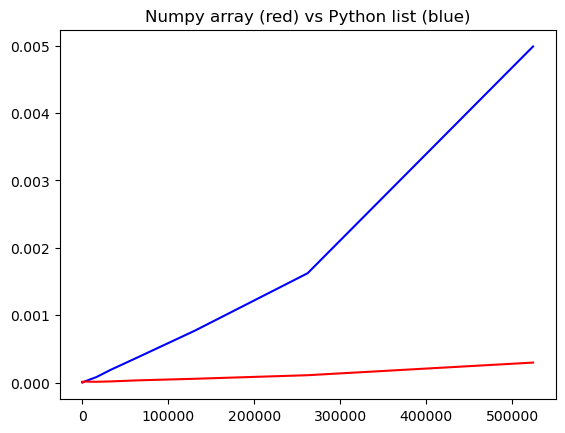

In [17]:
#CODE EXAMPLE
# a script to compare numpy arrays with python lists
import random
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer

n = 1
max_value = 1_000_000 #change to 5, 10 or 50 million.

timings_python_list = {}
timings_numpy_array = {}

while n <= max_value:
    python_list = [random.random() for i in range(0, n)]
    numpy_array = np.random.randint(255, size=n)

    # Time python list sum.
    start = timer()
    sum(python_list)
    end = timer()
    timings_python_list[n] = (end - start)
    # Time numpy array sum.
    start = timer()
    numpy_array.sum()
    end = timer()
    timings_numpy_array[n] = (end - start)

    n *= 2

plt.plot(timings_python_list.keys(), timings_python_list.values(),'b') #blue: the time of python list
plt.plot(timings_numpy_array.keys(), timings_numpy_array.values(),'r') #red: the time of numpy array
plt.title('Numpy array (red) vs Python list (blue)')
plt.show()

# To do

Store this notebook in your portfolio and update your Bloom's table. 

## Homework for next week: But what is a neural network?

Watch the video. It's a really great introduction to what we'll do next week. 
Next week we will take a deeper look into the MNIST dataset of written numbers.

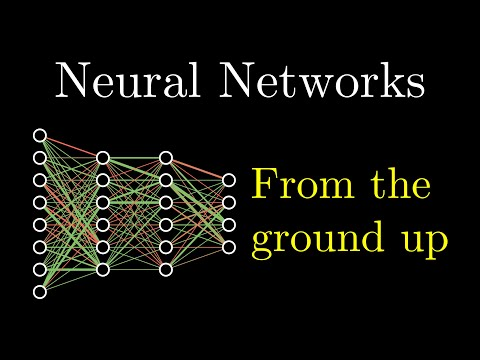

In [18]:
import IPython
IPython.display.YouTubeVideo('aircAruvnKk')